# **TIME SERIES ANALYSIS 📈 ARIMA, PROPHET, ADF, PACF**

# **BUSINESS PROBLEM**

GOAL: Forecasting Depth

Features:

    - Date: TimeSeries
    - Rainfall_Bastia_Umbra: indicates the quantity of rain falling Bastia Umbra (mm)
    - Temperature_Bastia_Umbra: indicates the temperature Bastia Umbra (°C)
    - Temperature_Petrignano: indicates the temperature Petrignano (°C)
    - Volume indicates the volume of water taken from the drinking water treatment plant (m 3 )
    - Hydrometry indicates the groundwater level (m)

Target:

    - Depth_to_Groundwater_P24: indicates the groundwater level (m from the ground floor)
    - Depth_to_Groundwater_P25: indicates the groundwater level (m from the ground floor)

In [151]:
import numpy as np 
import pandas as pd 
import warnings
warnings.simplefilter('ignore')

In [152]:
path = './dataset/Aquifer_Petrignano.csv'
df = pd.read_csv(path)
line = '='*30

In [153]:
def data_statistics(data):
    print('NUMERIC FEATURES')
    display(data.describe([0.05,0.25,0.75,0.95]).T)
    if('object' in data.dtypes.to_list()):
        print('CATEGORICAL FEATURES')
        display(data.describe(include='object').T)

def data_profile(data):
    count_of_duplicate = len(data[data.duplicated()])
    data_size = round(data.memory_usage(deep=True).sum()/1000000, 2)
    data_dimension = data.shape
    dtype = data.dtypes
    count_of_null = data.isna().sum()
    null_ratio = round(count_of_null/len(data), 2)
    count_of_distinct = data.nunique()
    distinct_value = data.apply(lambda x: x.unique())
    output = pd.DataFrame(list(zip(dtype, count_of_null, null_ratio, count_of_distinct, distinct_value)),
                          index=data.columns,
                          columns=['dtype','count_of_null','null_ratio','count_of_distinct','distinct_value'])
    print(f'Dimensions\t: {data_dimension}')
    print(f'Data Size\t: {data_size} MB')
    if count_of_duplicate == 0:
        print(f'Duplicated Data\t: {count_of_duplicate}')
    else:
        print(line)
        print(f'Duplicated Data\t: {count_of_duplicate}')
        display(data[data.duplicated()])
    print(line)
    print('SUMMARY')
    display(output)

In [154]:
data_profile(df)
data_statistics(df)
display(df.head())

Dimensions	: (5223, 8)
Data Size	: 0.64 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
Date,object,0,0.00,5223,"[14/03/2006, 15/03/2006, 16/03/2006, 17/03/200..."
Rainfall_Bastia_Umbra,float64,1024,0.20,223,"[nan, 0.0, 0.9, 1.1, 0.1, 4.1, 2.9, 7.0, 0.4, ..."
Depth_to_Groundwater_P24,float64,55,0.01,1306,"[-22.48, -22.38, -22.25, -22.6, -22.35, -22.5,..."
Depth_to_Groundwater_P25,float64,39,0.01,1298,"[-22.18, -22.14, -22.04, -21.95, -21.99, -21.8..."
Temperature_Bastia_Umbra,float64,1024,0.20,336,"[nan, 5.2, 2.3, 4.4, 0.8, -1.9, -0.7, 1.5, 4.3..."
Temperature_Petrignano,float64,1024,0.20,320,"[nan, 4.9, 2.5, 3.9, 0.8, -2.1, -0.7, -0.3, 6...."
Volume_C10_Petrignano,float64,198,0.04,4324,"[nan, -29281.824, -29245.536, -29355.264, -301..."
Hydrometry_Fiume_Chiascio_Petrignano,float64,1024,0.20,25,"[nan, 2.4, 2.5, 2.3, 2.6, 2.7, 2.8, 2.9, 2.2, ..."


NUMERIC FEATURES


,count,mean,std,min,5%,25%,50%,75%,95%,max
Rainfall_Bastia_Umbra,4199.0,1.556633,5.217923,0.000,0.0000,0.00,0.00,0.10,10.400,67.30
Depth_to_Groundwater_P24,5168.0,-26.263723,3.319858,-34.470,-32.7765,-28.25,-25.99,-23.82,-21.170,-19.66
Depth_to_Groundwater_P25,5184.0,-25.692926,3.214165,-33.710,-31.8600,-27.62,-25.54,-23.43,-20.660,-19.10
Temperature_Bastia_Umbra,4199.0,15.030293,7.794871,-3.700,2.8000,8.80,14.70,21.40,27.600,33.00
Temperature_Petrignano,4199.0,13.739081,7.701369,-4.200,0.9000,7.70,13.50,20.00,26.200,31.10
Volume_C10_Petrignano,5025.0,-29043.296726,4751.864371,-45544.896,-36826.2720,-31678.56,-28689.12,-26218.08,-22976.352,0.00
Hydrometry_Fiume_Chiascio_Petrignano,4199.0,2.372517,0.589088,0.000,1.9000,2.10,2.40,2.70,3.100,4.10


CATEGORICAL FEATURES


,count,unique,top,freq
Date,5223,5223,14/03/2006,1


,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


# **DATA CLEANSING**

In [155]:
# remove rows in column Rainfall_Bastia_Umbra is null
df_clean = df.copy()
# df_clean = df.dropna(subset='Rainfall_Bastia_Umbra').reset_index(drop=True)   # same value
df_clean = df[df.Rainfall_Bastia_Umbra.notnull()].reset_index(drop=True)        # same value

# remove not usefull columns
df_clean.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1, inplace=True)

# simplify columns names
columns = ['Date','Rainfall','Depth','Temperature','DrainageVolume','Hydrometry']
target = ['Depth']
features = [i for i in columns if i not in target]
df_clean.columns = columns

In [156]:
data_profile(df_clean)
df_clean

Dimensions	: (4199, 6)
Data Size	: 0.45 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
Date,object,0,0.00,4199,"[01/01/2009, 02/01/2009, 03/01/2009, 04/01/200..."
Rainfall,float64,0,0.00,223,"[0.0, 0.9, 1.1, 0.1, 4.1, 2.9, 7.0, 0.4, 2.8, ..."
Depth,float64,27,0.01,1142,"[-31.14, -31.11, -31.07, -31.05, -31.01, -31.0..."
Temperature,float64,0,0.00,336,"[5.2, 2.3, 4.4, 0.8, -1.9, -0.7, 1.5, 4.3, 4.9..."
DrainageVolume,float64,1,0.00,3669,"[-24530.688, -28785.888, -25766.208, -27919.29..."
Hydrometry,float64,0,0.00,25,"[2.4, 2.5, 2.3, 2.6, 2.7, 2.8, 2.9, 2.2, 2.1, ..."


,Date,Rainfall,Depth,Temperature,DrainageVolume,Hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3
...,...,...,...,...,...,...
4194,26/06/2020,0.0,-25.07,25.7,-29930.688,2.5
4195,27/06/2020,0.0,-25.11,26.2,-31332.960,2.4
4196,28/06/2020,0.0,-25.19,26.9,-32120.928,2.4
4197,29/06/2020,0.0,-25.18,26.9,-30602.880,2.4


## **Check Chronological Order and Equidistant Timestamps**
The data should be in chronological order and the timestamps should be equidistant in time series. The chronological order can be achieved by sorting the dataframe by the timestamps. Equidisant timestamps indicates constant time intervals. To check this, the difference between each timestamp can be taken. If this is not the case, you can decide on a constant time interval and resample the data.


In [157]:
# from datetime import datetime

df_clean1 = df_clean.copy()
#convert date typedata to date
df_clean1['Date'] = pd.to_datetime(df_clean1.Date, format='%d/%m/%Y')
df_clean1 = df_clean1.sort_values('Date').reset_index(drop=True)

df_clean1['DeltaDiff'] = df_clean1.Date - df_clean1.Date.shift(1) 

print(df_clean1.DeltaDiff.sum(), df_clean1.DeltaDiff.count()) # Check Constant interval
display(df_clean1)
df_clean1.drop(['DeltaDiff'], axis=1, inplace=True)
data_profile(df_clean1)

4198 days 00:00:00 4198


,Date,Rainfall,Depth,Temperature,DrainageVolume,Hydrometry,DeltaDiff
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4,NaT
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5,1 days
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4,1 days
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4,1 days
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3,1 days
...,...,...,...,...,...,...,...
4194,2020-06-26,0.0,-25.07,25.7,-29930.688,2.5,1 days
4195,2020-06-27,0.0,-25.11,26.2,-31332.960,2.4,1 days
4196,2020-06-28,0.0,-25.19,26.9,-32120.928,2.4,1 days
4197,2020-06-29,0.0,-25.18,26.9,-30602.880,2.4,1 days


Dimensions	: (4199, 6)
Data Size	: 0.2 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
Date,datetime64[ns],0,0.00,4199,"[2009-01-01T00:00:00.000000000, 2009-01-02T00:..."
Rainfall,float64,0,0.00,223,"[0.0, 0.9, 1.1, 0.1, 4.1, 2.9, 7.0, 0.4, 2.8, ..."
Depth,float64,27,0.01,1142,"[-31.14, -31.11, -31.07, -31.05, -31.01, -31.0..."
Temperature,float64,0,0.00,336,"[5.2, 2.3, 4.4, 0.8, -1.9, -0.7, 1.5, 4.3, 4.9..."
DrainageVolume,float64,1,0.00,3669,"[-24530.688, -28785.888, -25766.208, -27919.29..."
Hydrometry,float64,0,0.00,25,"[2.4, 2.5, 2.3, 2.6, 2.7, 2.8, 2.9, 2.2, 2.1, ..."


## **Handle Missing Values**

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date

sns.set_context('notebook')
sns.set_palette('cool')
sns.set(rc={
    'figure.figsize':(16,5)
})

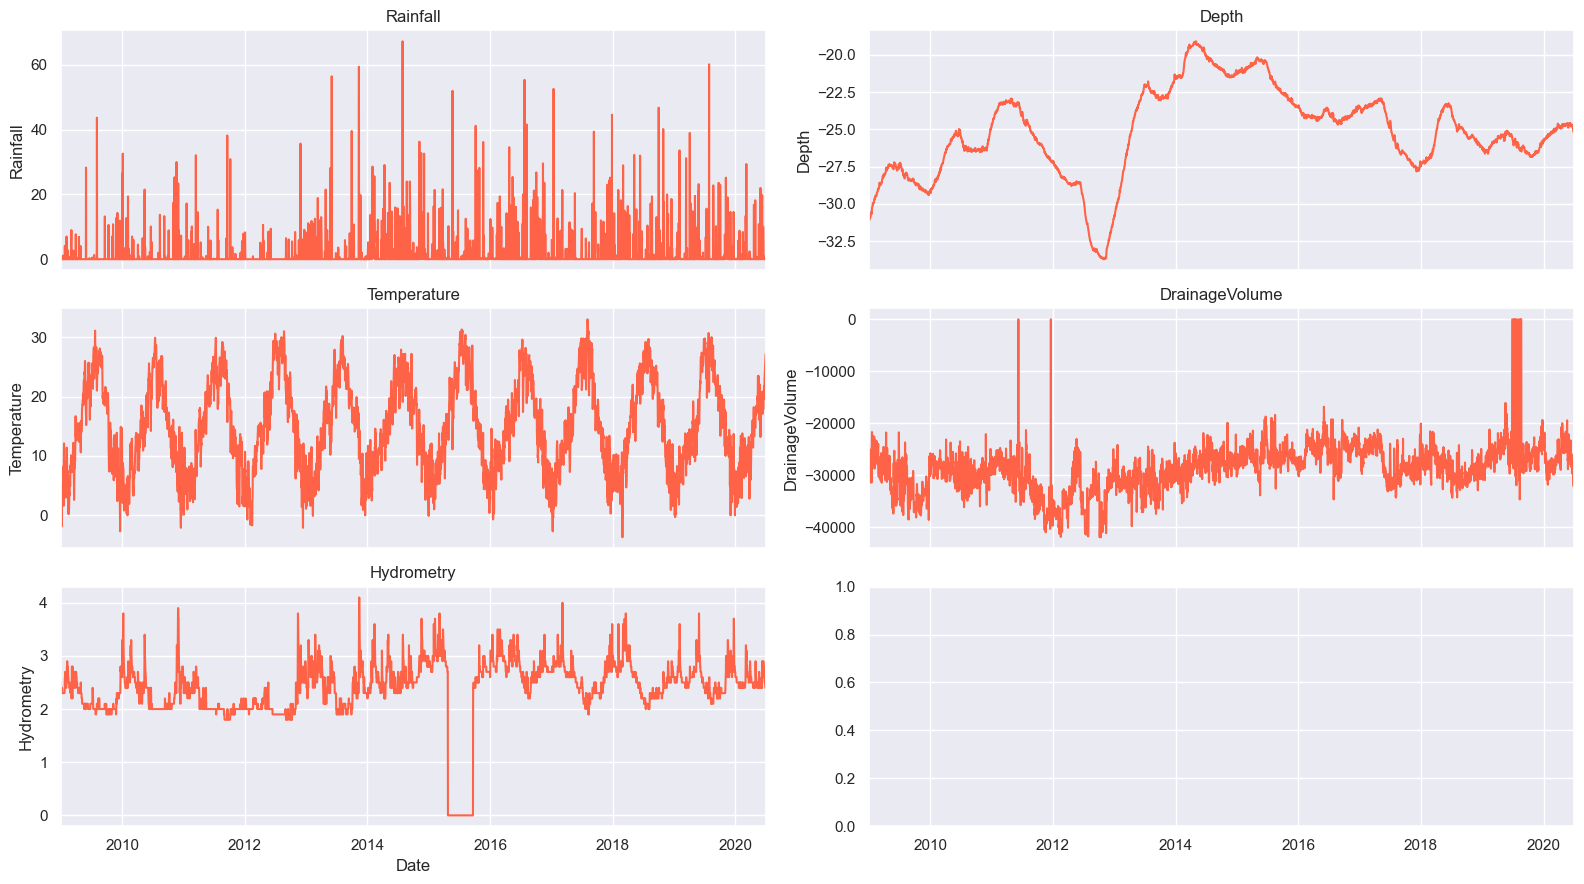

In [185]:
core_columns = [i for i in df_clean1.columns if i not in ['Date']]
def tsplot(data, features=False, feature=False, color='tomato', title=False):
    if features:
        f, ax = plt.subplots(3,2, figsize=(16,9), sharex=True)
        for index, value in enumerate(features):
            if (index%2==0): ax_0, ax_1 = int(index/2), 0
            if (index%2==1): ax_0, ax_1 = int(index/2-0.5), 1
            sns.lineplot(ax=ax[ax_0, ax_1], x=data.Date, y=data[value], color=color).set(
                title=value,
                xlim=[data.Date.min(), data.Date.max()])
    else:
        if title: tit = title
        else: tit = feature
        f, ax = plt.subplots(figsize=(16,3))
        sns.lineplot(x=data.Date, y=data[feature], color='tomato').set(
                title=tit,
                xlim=[data.Date.min(), data.Date.max()])
    plt.tight_layout()  
    
tsplot(df_clean1, features=core_columns)


As we can see, the dataset has some null values DrainageVolume, and Depth. For zero values in DrainageVolume, and Hydrometry is disgusting. So we have to fix missing values and zero values in DrainageVolume and Hydrometry. Lets take a look of these cases and explore what can we do with them.

Handle Missing Values for Time Series:

    - bfill or ffill
    - interpolation

[(16314.0, 16953.0)]

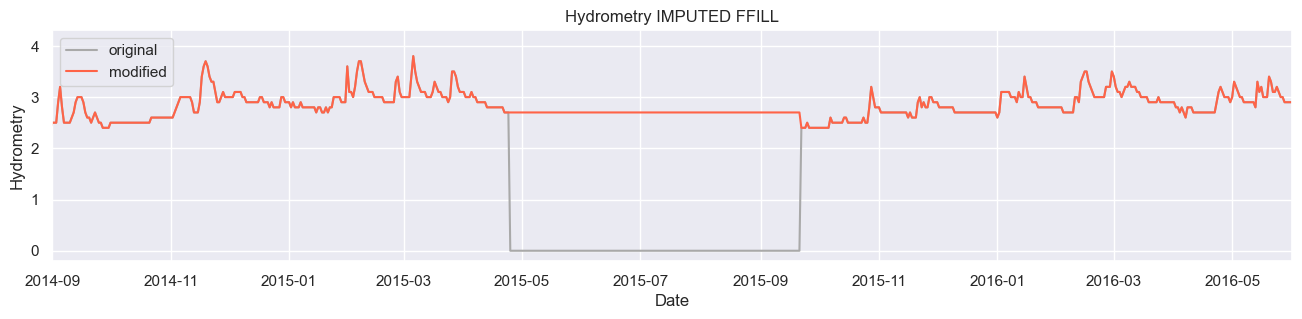

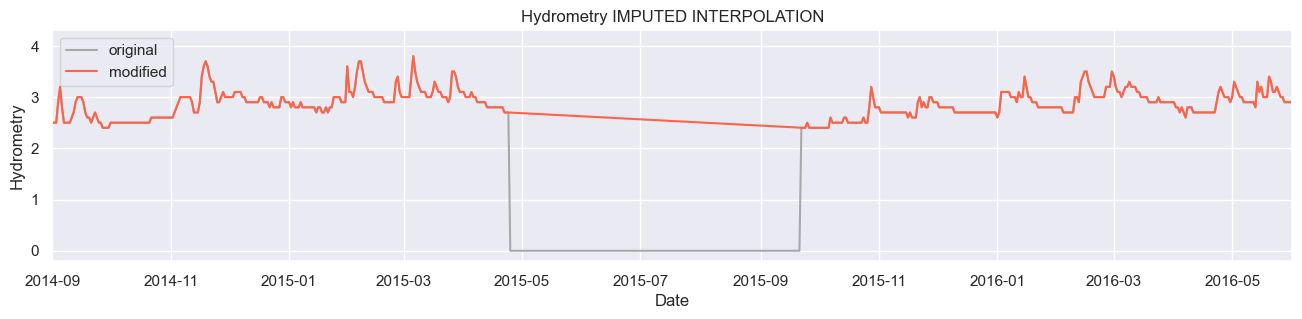

In [10]:
from datetime import date

df_clean2 = df_clean1.copy()
df_clean2.Hydrometry.replace(0, np.nan, inplace=True)

f, ax = plt.subplots(figsize=(16,3))
sns.lineplot(x=df_clean1.Date, y=df_clean1.Hydrometry, color='darkgray', label='original').set(
    title='Hydrometry IMPUTED FFILL',
    xlim=[date(2014,9,1), date(2016,6,1)])
sns.lineplot(x=df_clean2.Date, y=df_clean2.Hydrometry.fillna(method='ffill'), color='tomato', label='modified').set(
    xlim=[date(2014,9,1), date(2016,6,1)])
f, ax = plt.subplots(figsize=(16,3))
sns.lineplot(x=df_clean1.Date, y=df_clean1.Hydrometry, color='darkgray', label='original').set(
    title='Hydrometry IMPUTED INTERPOLATION',
    xlim=[date(2014,9,1), date(2016,6,1)])
sns.lineplot(x=df_clean2.Date, y=df_clean2.Hydrometry.interpolate(method='linear'), color='tomato', label='modified').set(
    xlim=[date(2014,9,1), date(2016,6,1)])

[(18017.0, 18170.0)]

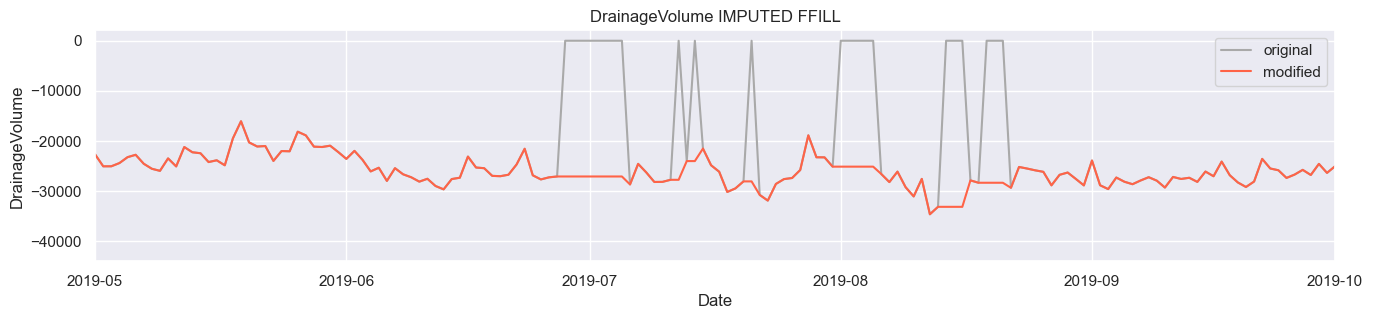

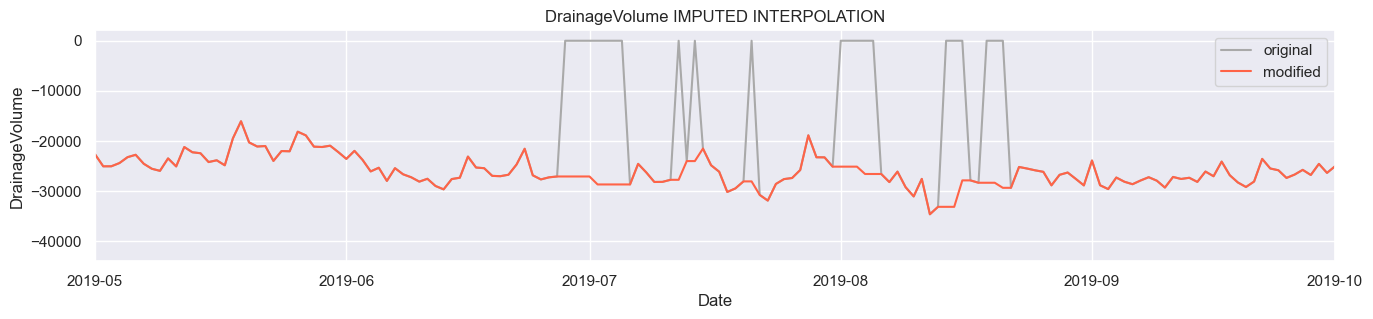

In [11]:
df_clean2.DrainageVolume.replace(0, np.nan, inplace=True)

f, ax = plt.subplots(figsize=(16,3))
sns.lineplot(x=df_clean1.Date, y=df_clean1.DrainageVolume, color='darkgray', label='original').set(
    title='DrainageVolume IMPUTED FFILL',
    xlim=[date(2019,5,1), date(2019,10,1)])
sns.lineplot(x=df_clean2.Date, y=df_clean2.DrainageVolume.fillna(method='ffill'), color='tomato', label='modified').set(
    xlim=[date(2019,5,1), date(2019,10,1)])
f, ax = plt.subplots(figsize=(16,3))
sns.lineplot(x=df_clean1.Date, y=df_clean1.DrainageVolume, color='darkgray', label='original').set(
    title='DrainageVolume IMPUTED INTERPOLATION',
    xlim=[date(2019,5,1), date(2019,10,1)])
sns.lineplot(x=df_clean2.Date, y=df_clean2.DrainageVolume.interpolate(method='nearest'), color='tomato', label='modified').set(
    xlim=[date(2019,5,1), date(2019,10,1)])

As we can see, the best option in this case, seems to best option!

So, lets interpolation missing values

In [12]:
df_clean2.DrainageVolume.interpolate(method='nearest', inplace=True)
df_clean2.Depth.interpolate(method='nearest', inplace=True)
df_clean2.Hydrometry.interpolate(method='linear', inplace=True)

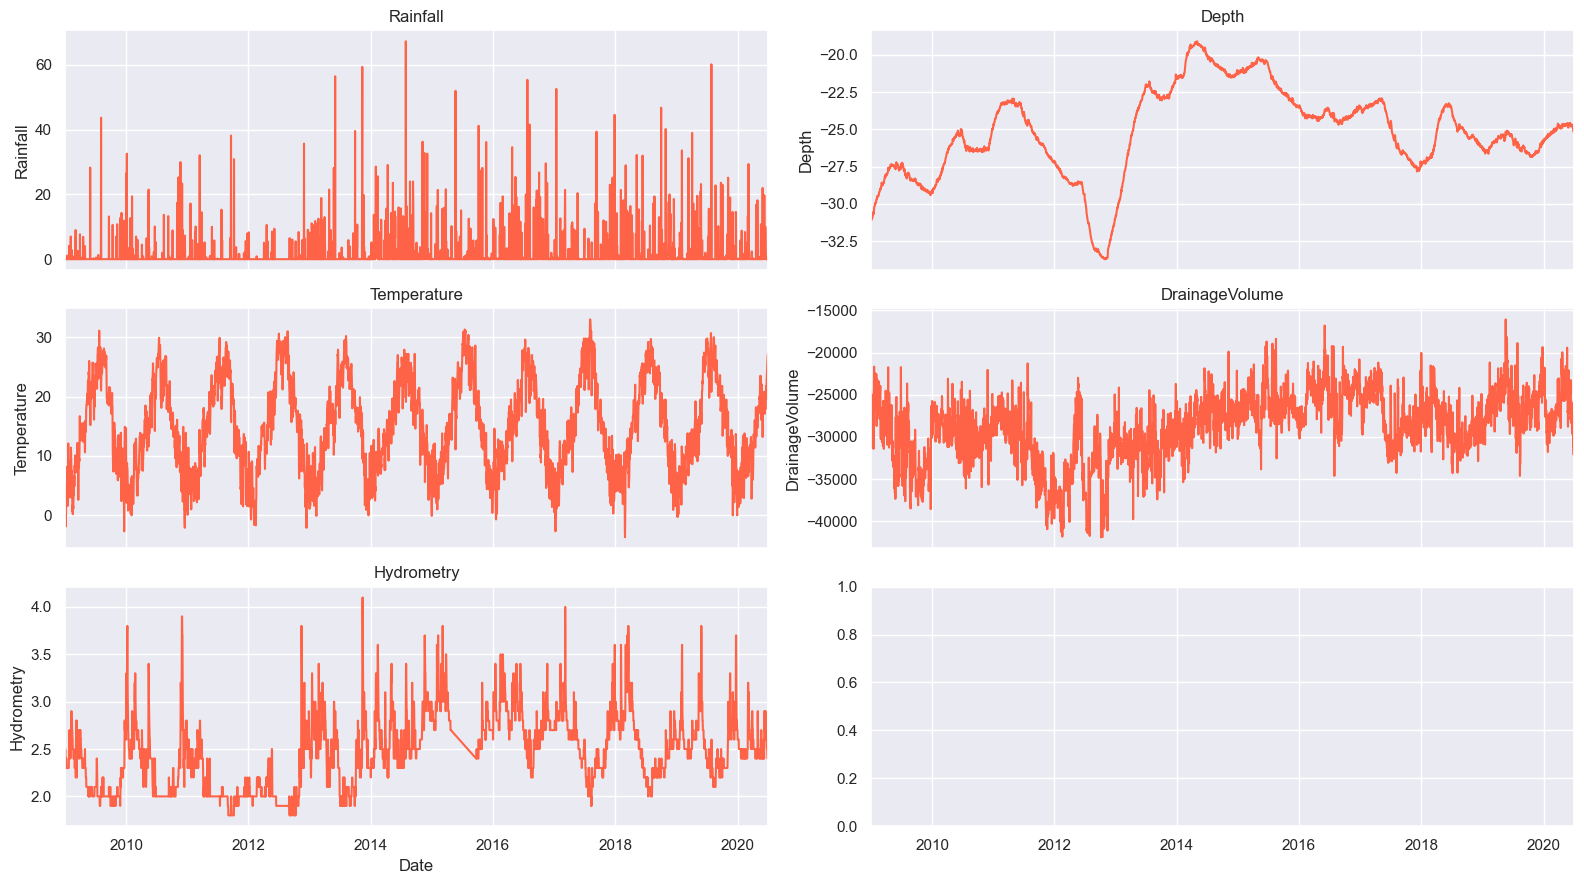

In [162]:
tsplot(df_clean2, features=core_columns)

# **FEATURE ENGINEERING**

## **Resampling Timeseries** 

Resampling can provide additional information on the data. There are two types of resampling:
    
    - Upsampling is when the frequency of samples is increased (e.g. days to hours)
    - Downsampling is when the frequency of samples is decreased (e.g. days to weeks)

In this example, we will do some downsampling with the .resample() function (similar to groupby and aggregate as mean).

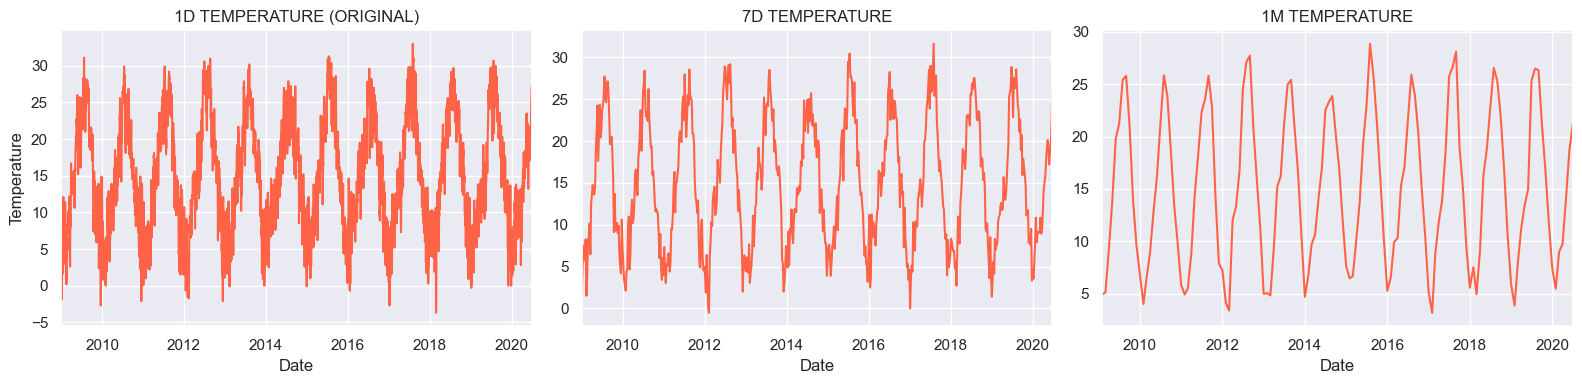

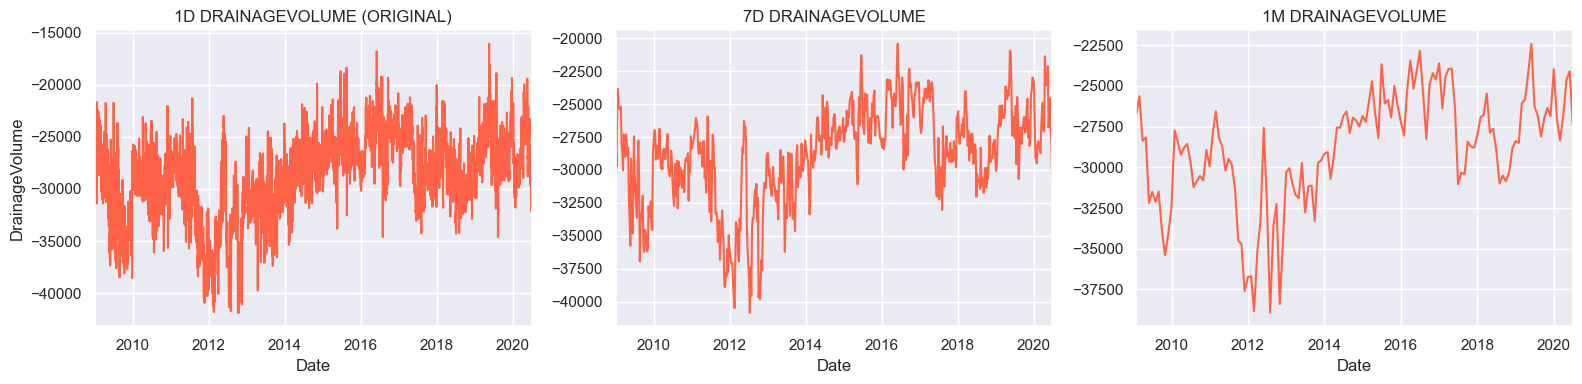

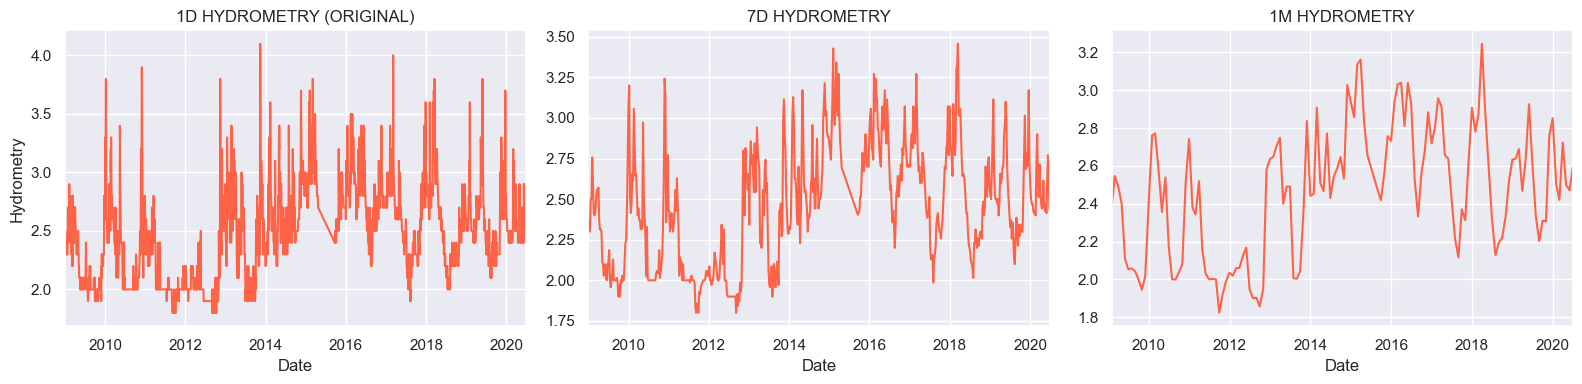

In [14]:
down_7D = df_clean2[df_clean2.columns].resample('7D', on='Date').mean().reset_index()
down_1M = df_clean2[df_clean2.columns].resample('1M', on='Date').mean().reset_index()

f, ax = plt.subplots(1,3, figsize=(16, 4))
sns.lineplot(x=df_clean2.Date, y=df_clean2.Temperature, color='tomato', ax=ax[0]).set(
        title='1D TEMPERATURE (ORIGINAL)',
        xlim=[df_clean2.Date.min(), df_clean2.Date.max()])
sns.lineplot(x=down_7D.Date, y=down_7D.Temperature, color='tomato', ax=ax[1]).set(
        ylabel='',
        title='7D TEMPERATURE',
        xlim=[down_7D.Date.min(), down_7D.Date.max()])
sns.lineplot(x=down_1M.Date, y=down_1M.Temperature, color='tomato', ax=ax[2]).set(
        ylabel='',
        title='1M TEMPERATURE',
        xlim=[down_1M.Date.min(), down_1M.Date.max()])
plt.tight_layout()

f, ax = plt.subplots(1,3, figsize=(16, 4))
sns.lineplot(x=df_clean2.Date, y=df_clean2.DrainageVolume, color='tomato', ax=ax[0]).set(
        title='1D DRAINAGEVOLUME (ORIGINAL)',
        xlim=[df_clean2.Date.min(), df_clean2.Date.max()])
sns.lineplot(x=down_7D.Date, y=down_7D.DrainageVolume, color='tomato', ax=ax[1]).set(
        ylabel='',
        title='7D DRAINAGEVOLUME',
        xlim=[down_7D.Date.min(), down_7D.Date.max()])
sns.lineplot(x=down_1M.Date, y=down_1M.DrainageVolume, color='tomato', ax=ax[2]).set(
        ylabel='',
        title='1M DRAINAGEVOLUME',
        xlim=[down_1M.Date.min(), down_1M.Date.max()])
plt.tight_layout()

f, ax = plt.subplots(1,3, figsize=(16, 4))
sns.lineplot(x=df_clean2.Date, y=df_clean2.Hydrometry, color='tomato', ax=ax[0]).set(
        title='1D HYDROMETRY (ORIGINAL)',
        xlim=[df_clean2.Date.min(), df_clean2.Date.max()])
sns.lineplot(x=down_7D.Date, y=down_7D.Hydrometry, color='tomato', ax=ax[1]).set(
        ylabel='',
        title='7D HYDROMETRY',
        xlim=[down_7D.Date.min(), down_7D.Date.max()])
sns.lineplot(x=down_1M.Date, y=down_1M.Hydrometry, color='tomato', ax=ax[2]).set(
        ylabel='',
        title='1M HYDROMETRY',
        xlim=[down_1M.Date.min(), down_1M.Date.max()])
plt.tight_layout()

As we can see, downsample to weekly could smooth the data. Meanwhile downsample to monthly oversmooth.

In [15]:
df_clean3 = df_clean2.copy()
df_clean3 = df_clean3[df_clean3.columns].resample('7D', on='Date').mean().reset_index()

## **Time Series Decomposition**
Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

These components are defined as follows:

- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and     forecasting. All series have a level and noise. The trend and seasonality components are optional. It is helpful to think of the components as combining either additively or multiplicatively. In this case we are going to use function seasonal_decompose() from the statsmodels library. 

The combination of the components in time series can be of two types:

- Additive
- Multiplicative

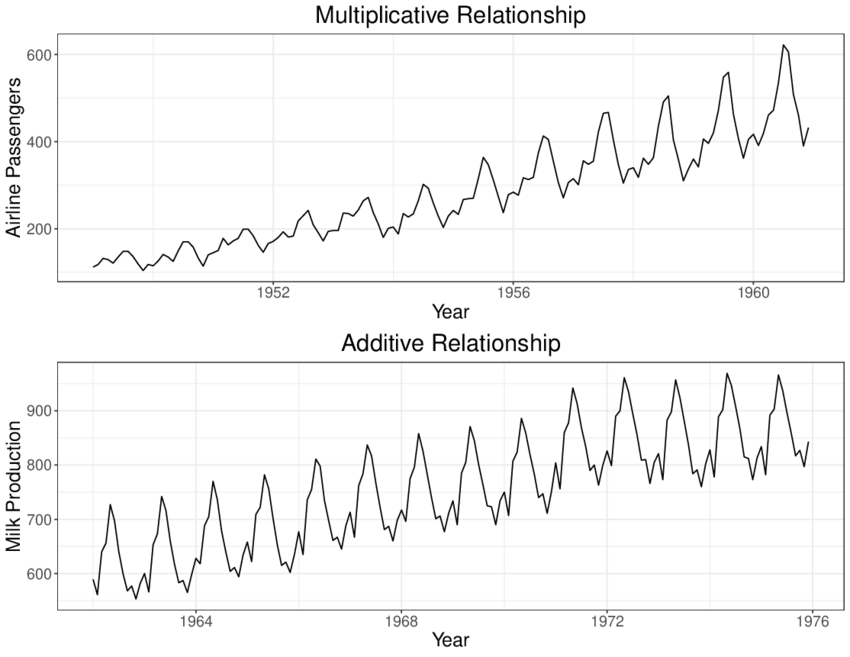

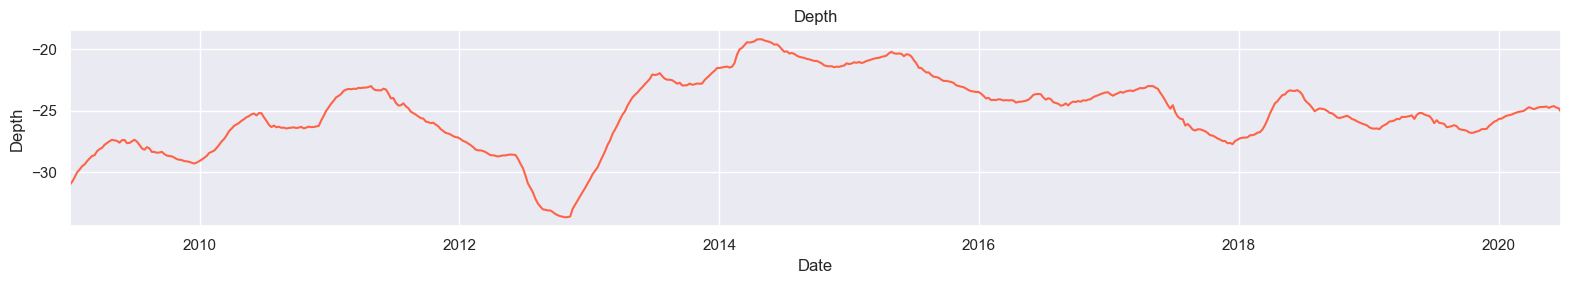

In [213]:
tsplot(df_clean3, feature='Depth')

As we can see, there is no patern. So we going to apply additive to depth decompositions

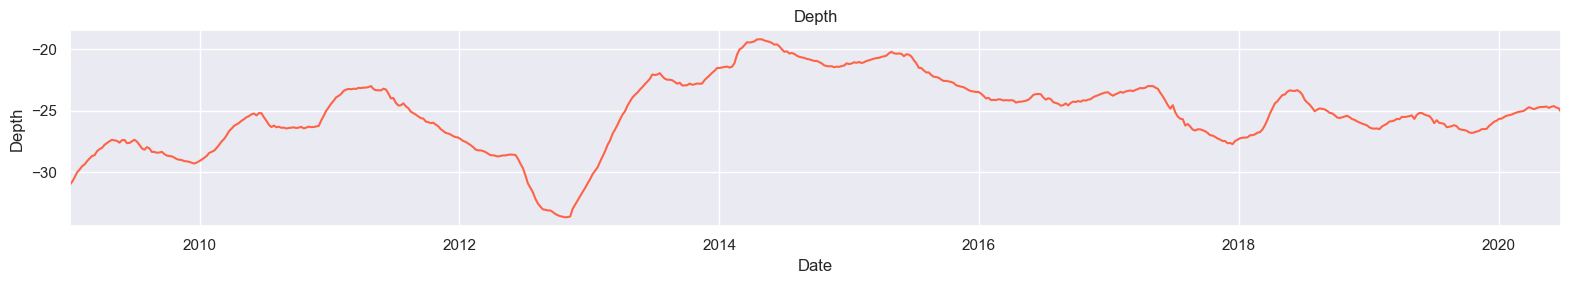

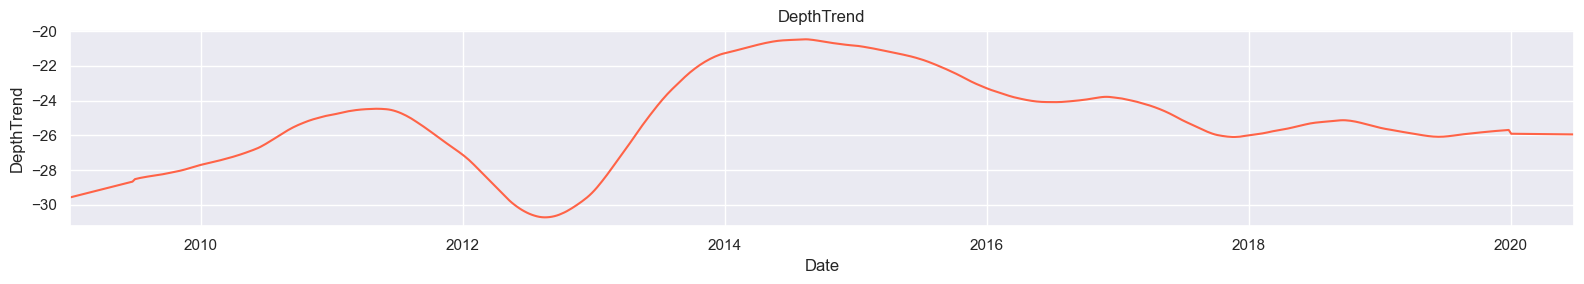

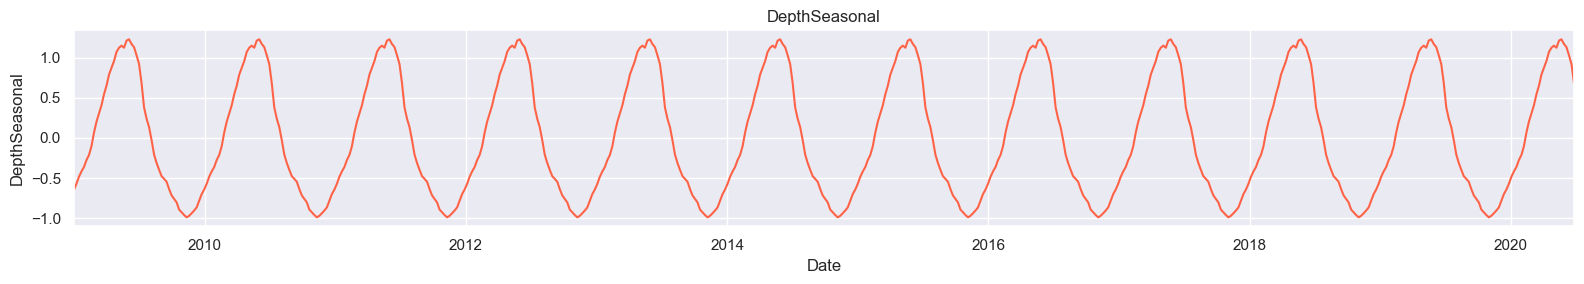

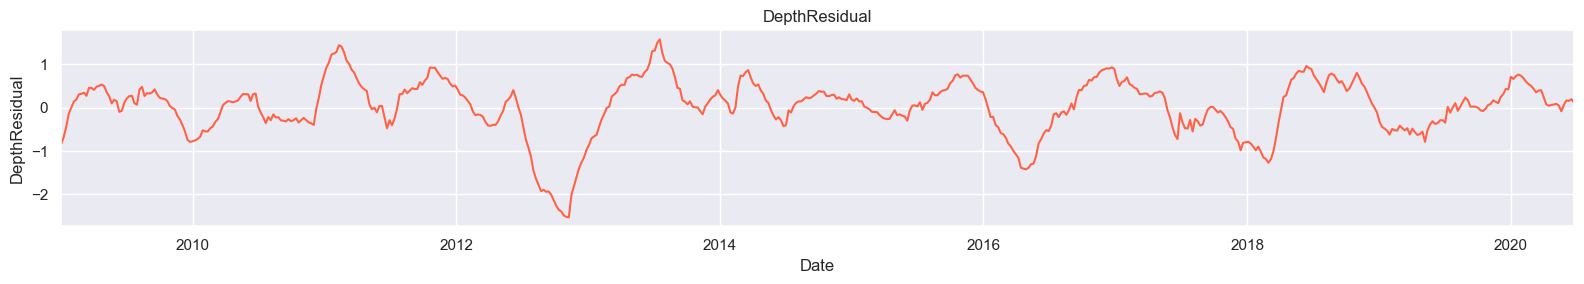

In [221]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_clean4 = df_clean3.copy()
period = 52 # num of week in year

# for value in core_columns:
#     decomp = seasonal_decompose(df_clean4[value], period=period, model='additive', extrapolate_trend='freq')
#     df_clean4[f"{value}Trend"] = decomp.trend
#     df_clean4[f"{value}Seasonal"] = decomp.seasonal

decomp = seasonal_decompose(df_clean4.Depth, period=period, model='additive', extrapolate_trend='freq')
df_clean4['DepthTrend'] = decomp.trend
df_clean4['DepthSeasonal'] = decomp.seasonal
df_clean4['DepthResidual'] = decomp.resid

tsplot(df_clean4, feature='Depth')
tsplot(df_clean4, feature='DepthTrend')
tsplot(df_clean4, feature='DepthSeasonal')
tsplot(df_clean4, feature='DepthResidual')

## **Stationarity**
Some time-series models, such as such as ARIMA, assume that the underlying data is stationary. A time series with cyclic behaviour **(but with no trend or seasonality)** is stationary. Stationarity describes that the time-series has:

    - constant mean and mean is not time-dependent
    - constant variance and variance is not time-dependent
    - constant covariance and covariance is not time-dependent

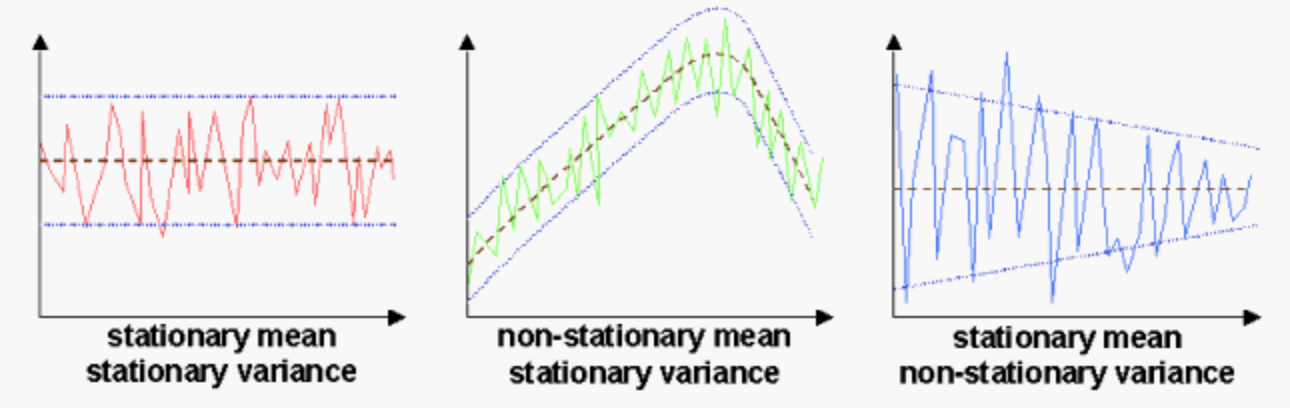

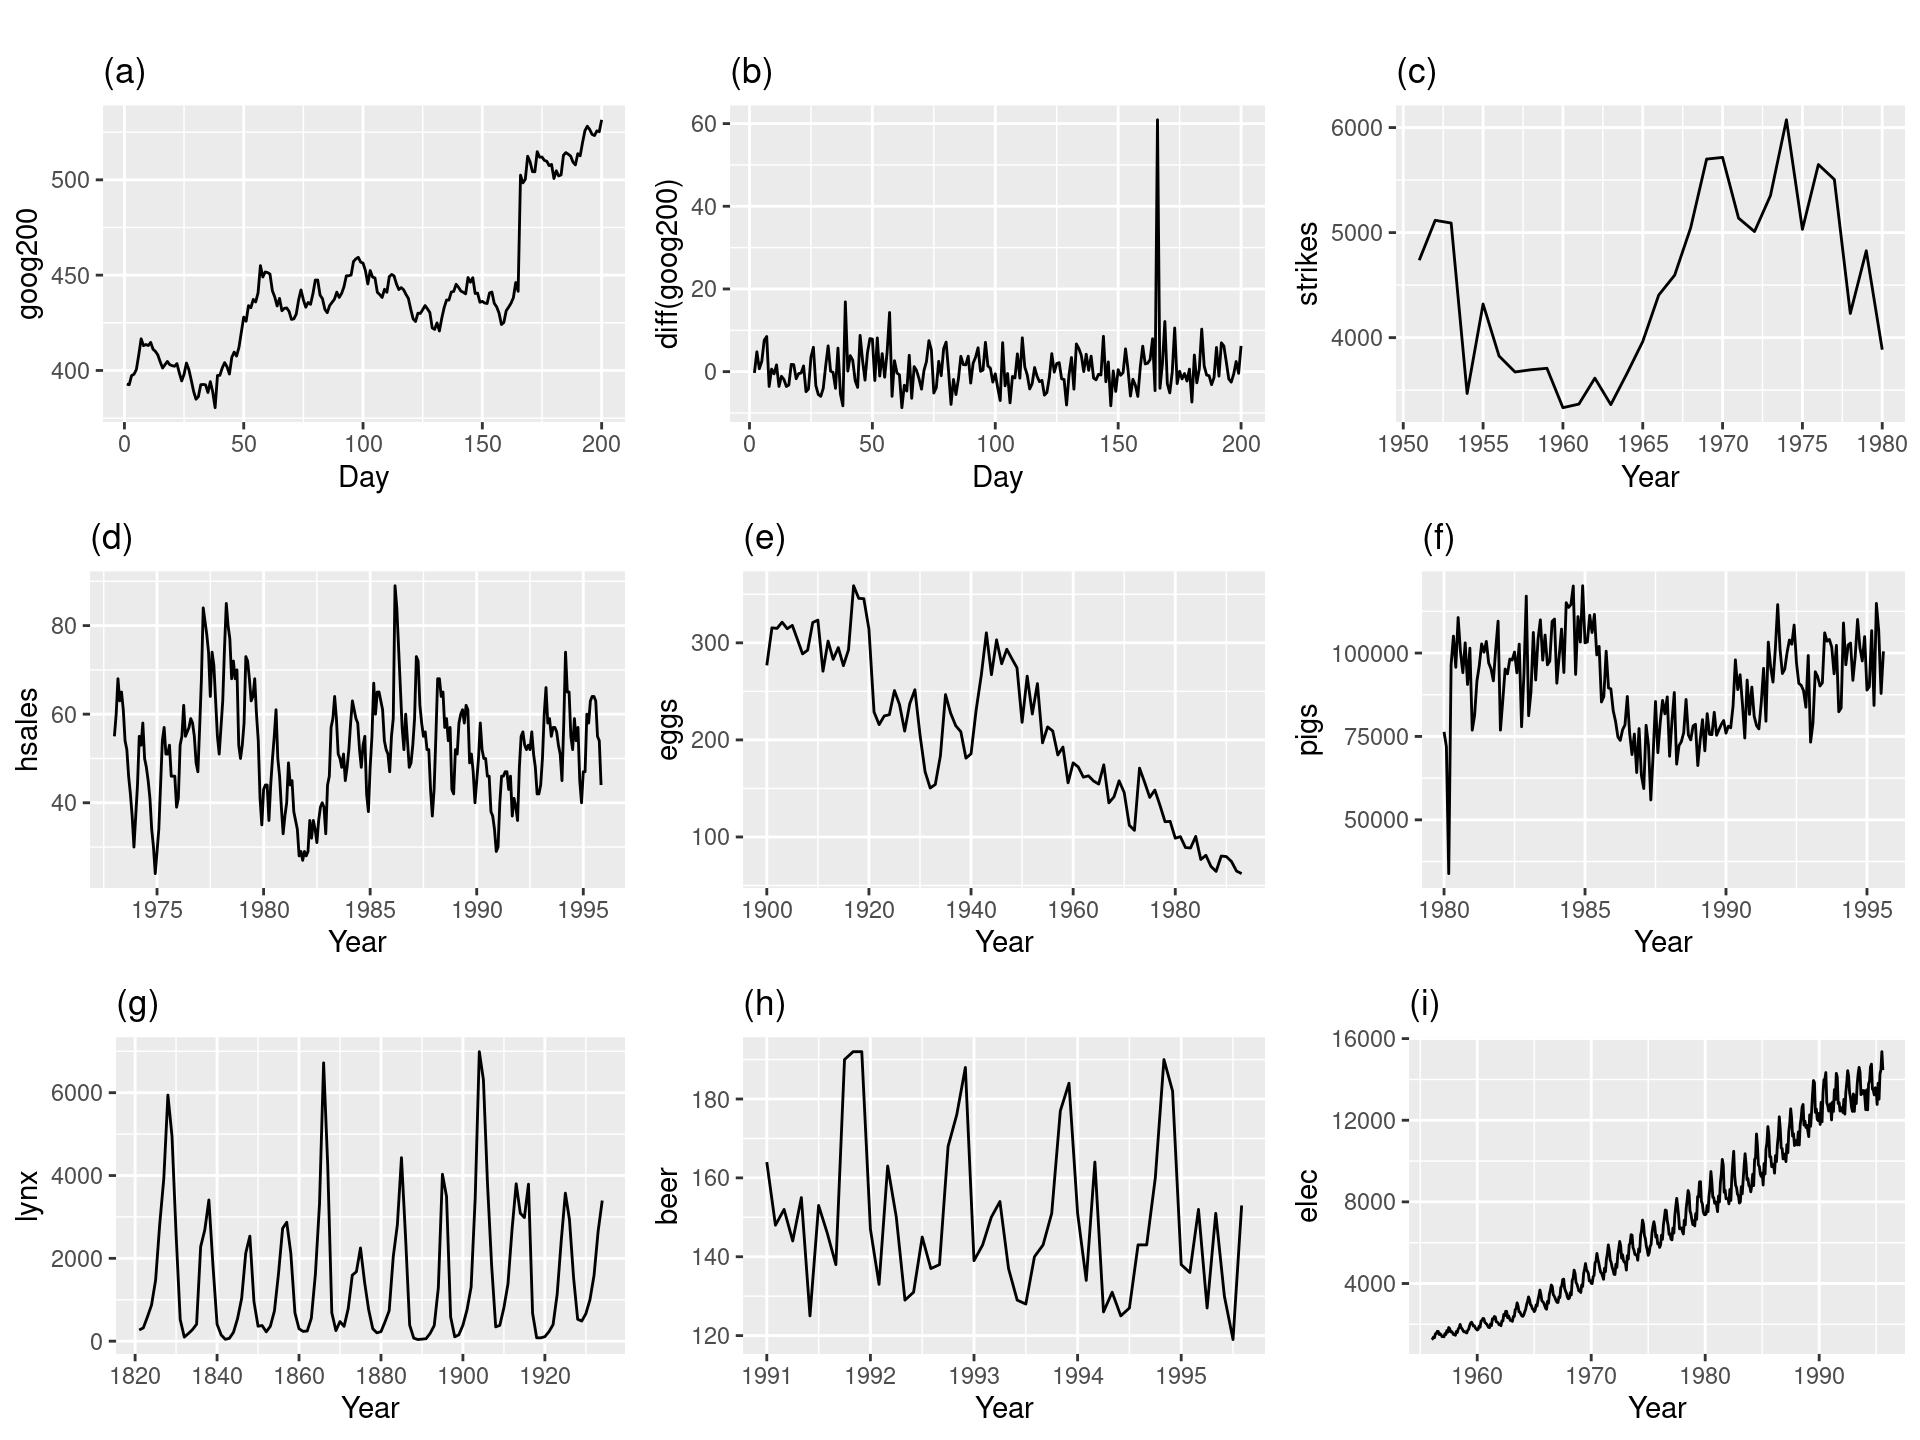

Ex: Obvious seasonality rules out series (d), (h) and (i). Trends and changing levels rules out series (a), (c), (e), (f) and (i). Increasing variance also rules out (i). That leaves only (b) and (g) as stationary series.

The check for stationarity can be done via three different approaches:

    - visually: plot time series and check for trends or seasonality
    - basic statistics: split time series and compare the mean and variance of each partition
    - statistical test: Augmented Dickey Fuller test


### **Test ADF (Augmented Dickey-Fuller)**

Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

    - Null Hypothesis (H0): Time series has a unit root. (Time series is not stationary).
    - Alternate Hypothesis (H1): Time series has no unit root (Time series is stationary).

If the null hypothesis can be rejected, we can conclude that the time series is stationary. There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

    - p-value > significance level (default: 0.05)**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    - p-value <= significance level (default: 0.05)**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

    - ADF statistic > critical value: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    - ADF statistic < critical value: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [17]:
from statsmodels.tsa.stattools import adfuller

# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
result = adfuller(df_clean3.Depth) #[adf, pvalue, usedlag, nobs, critical_values, icbest, resstrore]

In [165]:
def adfuller_test(data, feature, alpa=0.05):
    alpha = 0.05
    adf_test = adfuller(data[feature])
    adf_value = adf_test[0]
    pvalue = adf_test[1]
    critical_value_1 = adf_test[4]['1%']
    critical_value_5 = adf_test[4]['5%']
    critical_value_10 = adf_test[4]['10%']
    if pvalue <= alpa: 
        sign = '<=' 
        result = f'Reject H0: {feature} is Stationary'
    else: 
        sign = '>'
        result = f'Failed to Reject H0: {feature} is Non-Stationary'
    output = [
        f'{line}\n',
        f'FEATURE: {feature}\n\n',
        f'H0: Non-Stationary\n',
        f'H1: Stationary\n\n',
        f'p-value {pvalue:.4f} {sign} {alpha} --> {result}'
    ]
    print(''.join(output))

In [166]:
for index, feature in enumerate([i for i in df_clean4.columns if i not in ['Date']]):
    adfuller_test(data=df_clean4, feature=feature)

FEATURE: Rainfall

H0: Non-Stationary
H1: Stationary

p-value 0.0119 <= 0.05 --> Reject H0: Rainfall is Stationary
FEATURE: Depth

H0: Non-Stationary
H1: Stationary

p-value 0.0479 <= 0.05 --> Reject H0: Depth is Stationary
FEATURE: Temperature

H0: Non-Stationary
H1: Stationary

p-value 0.0000 <= 0.05 --> Reject H0: Temperature is Stationary
FEATURE: DrainageVolume

H0: Non-Stationary
H1: Stationary

p-value 0.0338 <= 0.05 --> Reject H0: DrainageVolume is Stationary
FEATURE: Hydrometry

H0: Non-Stationary
H1: Stationary

p-value 0.0000 <= 0.05 --> Reject H0: Hydrometry is Stationary


As we can see, all features reject hypothesis null. It means the data is stationary. If the data is not stationary but we want to use a model such as ARIMA (that requires this characteristic), the data has to be transformed. If we fit a stationary model to data, we assume our data are a realization of a stationary process. So our first step in an analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them.

The two most common methods to transform TARGET series into stationarity ones are:

    - Transformation: e.g. log or square root or box-cox or yeo-johnson to stabilize non-constant variance (Using this method)
    - Differencing: subtracts the current value from the previous to stabilize mean

### **Feature Transformation to Stabilize Variance**

In [167]:
def histBoxPlot(feature, figsize=(16,4), bins=None, title=''):
    f,(ax_box,ax_hist)=plt.subplots(nrows=2,sharex=True, gridspec_kw={'height_ratios':(0.1,0.9)},figsize=figsize)                                  
    sns.distplot(feature,kde=True,ax=ax_hist,bins=bins,color='violet',label=f'stdev {np.std(feature):.4f}').set(xlabel='') 
    sns.boxplot(x=feature,ax=ax_box, color='violet').set(xlabel=None)
    ax_hist.axvline(np.mean(feature),color='purple',linestyle=':', label=f'mean {np.mean(feature):.4f}')
    ax_hist.axvline(np.median(feature),color='purple',linestyle='--', label=f'median {np.median(feature):.4f}')
    plt.legend()
    plt.suptitle(title)
    plt.tight_layout()

FEATURE: DepthBoxcox

H0: Non-Stationary
H1: Stationary

p-value 0.0421 <= 0.05 --> Reject H0: DepthBoxcox is Stationary


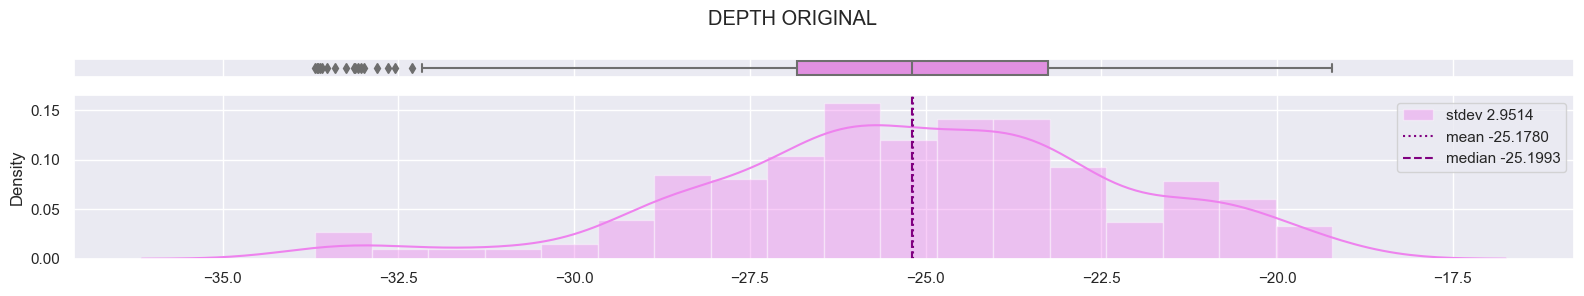

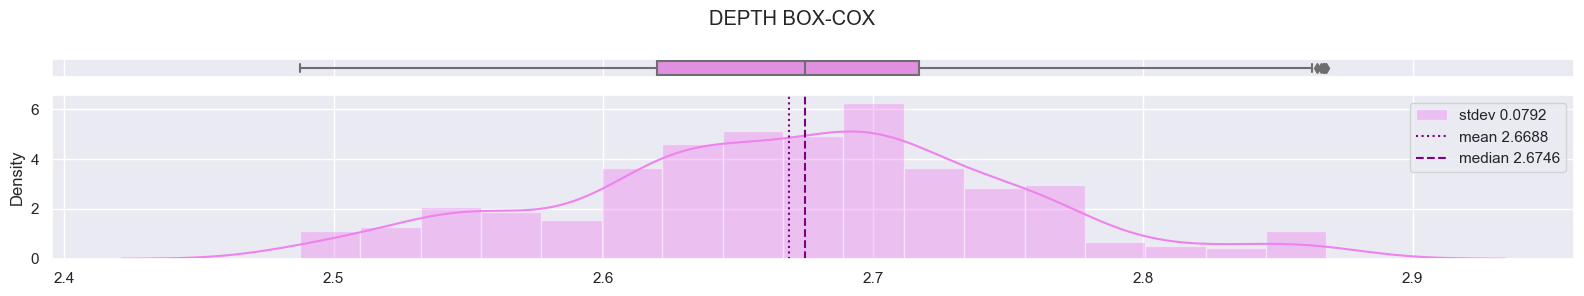

In [227]:
import scipy.stats as stats

df_clean5 = df_clean4.copy()
# df_clean5['DepthLog'] = np.log(abs(df_clean5.Depth))            # add abs if negative value
# df_clean5['DepthYJ'], _ = stats.yeojohnson(df_clean5.Depth)
# df_clean5['DepthAbsYJ'], _ = stats.yeojohnson(np.abs(df_clean5.Depth))
df_clean5['DepthBoxcox'], _ = stats.boxcox(np.abs(df_clean5.Depth))   # Can't negative value

histBoxPlot(df_clean5.Depth, title='DEPTH ORIGINAL', figsize=(16,3))
histBoxPlot(df_clean5.DepthBoxcox, title='DEPTH BOX-COX', figsize=(16,3))
# histBoxPlot(df_clean5.DepthLog, title='DEPTH LOG', figsize=(16,3))
# histBoxPlot(df_clean5.DepthYJ, title='DEPTH YEO-JOHNSON', figsize=(16,3))
# histBoxPlot(df_clean5.DepthAbsYJ, title='DEPTH ABS YEO-JOHNSON', figsize=(16,3))

adfuller_test(data=df_clean5, feature='DepthBoxcox')

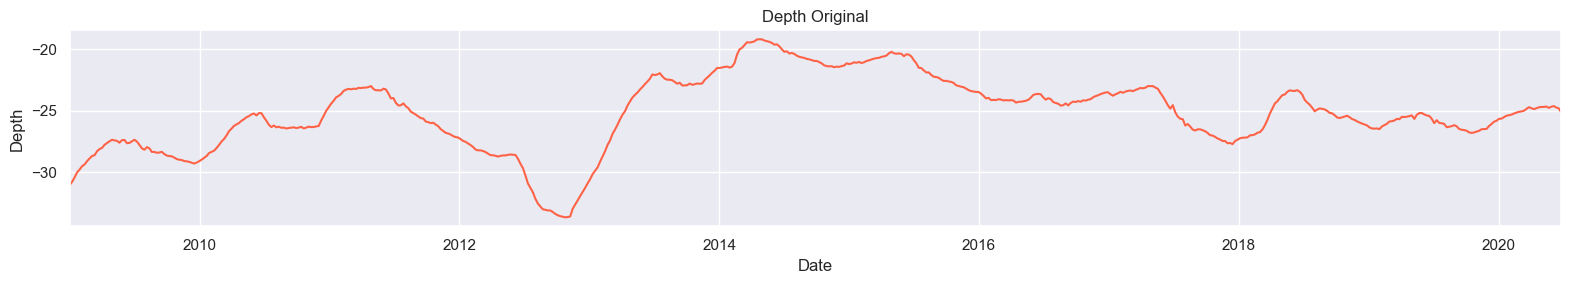

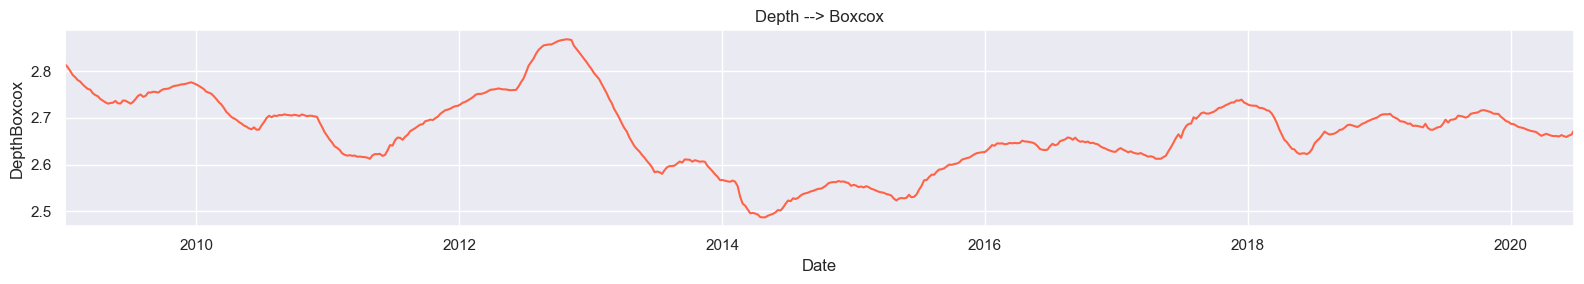

In [223]:
tsplot(df_clean5, feature='Depth', title='Depth Original')
tsplot(df_clean5, feature='DepthBoxcox', title='Depth --> Boxcox')

### **Differincing to Stabilize Mean**
find d value and stabilize mean

FEATURE: DepthDiff1

H0: Non-Stationary
H1: Stationary

p-value 0.0000 <= 0.05 --> Reject H0: DepthDiff1 is Stationary
FEATURE: DepthBoxcoxDiff1

H0: Non-Stationary
H1: Stationary

p-value 0.0000 <= 0.05 --> Reject H0: DepthBoxcoxDiff1 is Stationary


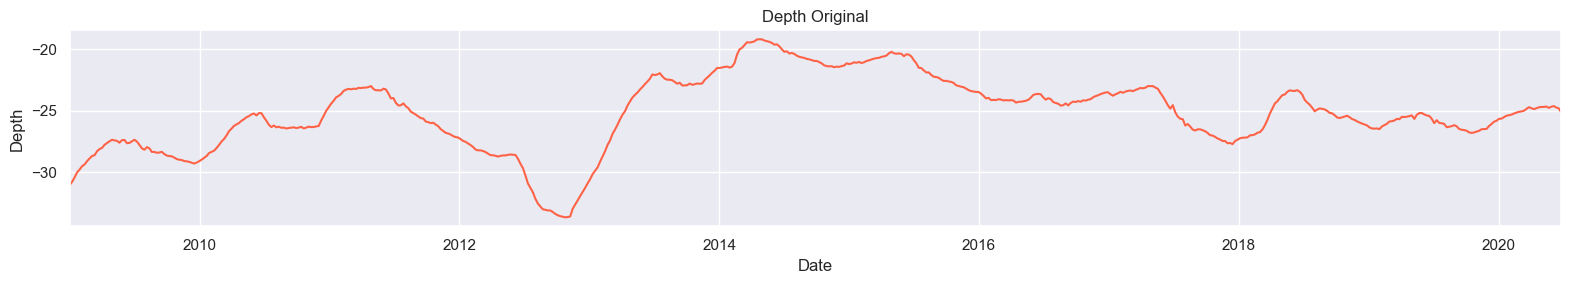

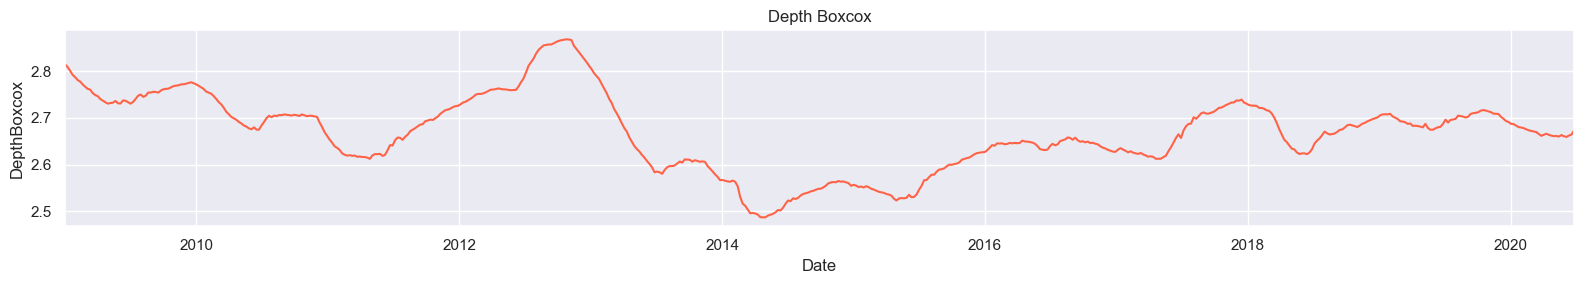

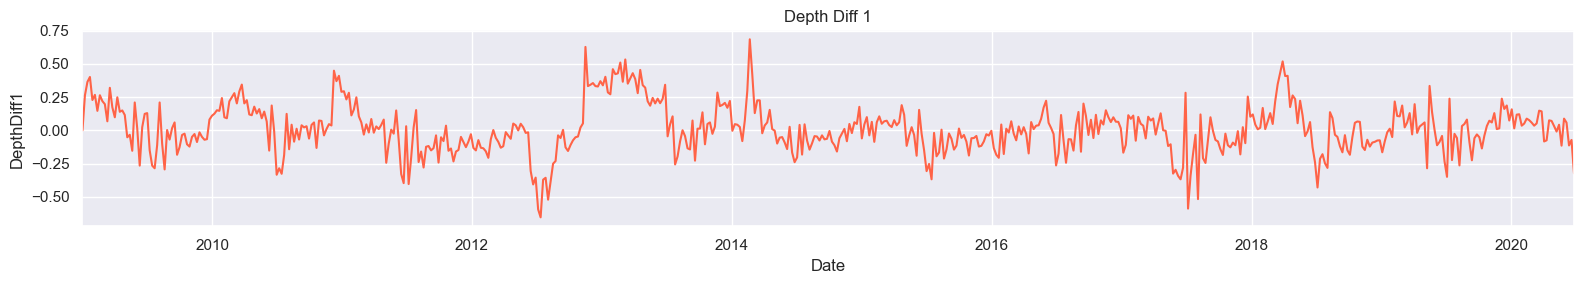

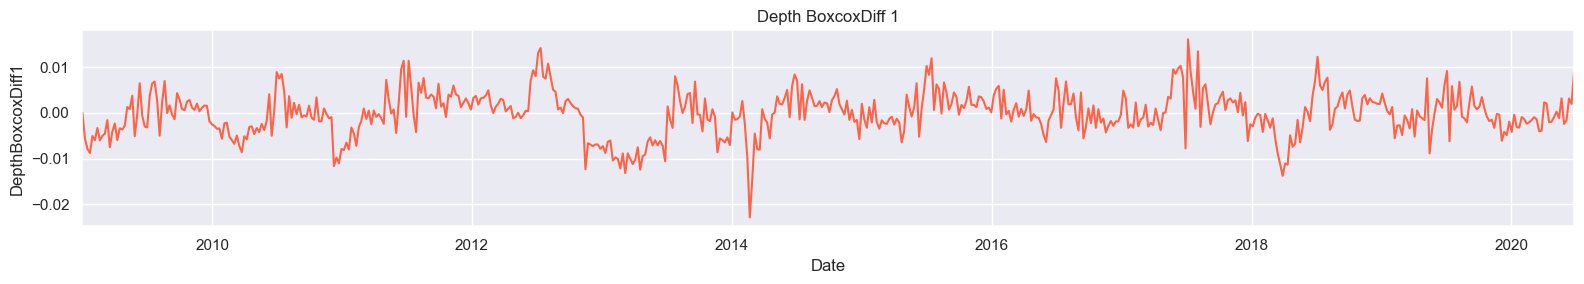

In [228]:
df_clean5['DepthDiff1'] = df_clean5.Depth.diff().fillna(0)
df_clean5['DepthBoxcoxDiff1'] = df_clean5.DepthBoxcox.diff().fillna(0)

adfuller_test(data=df_clean5, feature='DepthDiff1')
adfuller_test(data=df_clean5, feature='DepthBoxcoxDiff1')
tsplot(df_clean5, feature='Depth', title='Depth Original')
tsplot(df_clean5, feature='DepthBoxcox', title='Depth Boxcox')
tsplot(df_clean5, feature='DepthDiff1', title='Depth Diff 1')
tsplot(df_clean5, feature='DepthBoxcoxDiff1', title='Depth BoxcoxDiff 1')

The differenced data looks stationary so we don’t have to go for any further differencing.

## **Add ParserTime Feature**

In [229]:
df_clean6 = df_clean5.copy()

df_clean6['Year'] = df_clean6.Date.dt.year
df_clean6['Month'] = df_clean6.Date.dt.month
df_clean6['Day'] = df_clean6.Date.dt.day
df_clean6['DayOfYear'] = df_clean6.Date.dt.dayofyear
df_clean6['WeekOfYear'] = df_clean6.Date.dt.weekofyear
df_clean6['Quarter'] = df_clean6.Date.dt.quarter
# df_clean6['Year'] = pd.DatetimeIndex(df_clean6.Date).year
# df_clean6['Month'] = pd.DatetimeIndex(df_clean6.Date).month
# df_clean6['Day'] = pd.DatetimeIndex(df_clean6.Date).day
# df_clean6['DayOfYear'] = pd.DatetimeIndex(df_clean6.Date).dayofyear
# df_clean6['WeekOfYear'] = pd.DatetimeIndex(df_clean6.Date).weekofyear
# df_clean6['Quarter'] = pd.DatetimeIndex(df_clean6.Date).quarter
df_clean6['Season'] = df_clean6.Month % 12 // 3 + 1 ## -> // == math.floor

data_profile(df_clean6)
df_clean6

Dimensions	: (600, 19)
Data Size	: 0.09 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
Date,datetime64[ns],0,0.0,600,"[2009-01-01T00:00:00.000000000, 2009-01-08T00:..."
Rainfall,float64,0,0.0,251,"[0.0, 0.2857142857142857, 0.028571428571428574..."
Depth,float64,0,0.0,575,"[-31.048571428571428, -30.784285714285716, -30..."
Temperature,float64,0,0.0,524,"[1.6571428571428573, 4.571428571428571, 7.5285..."
DrainageVolume,float64,0,0.0,599,"[-28164.918857142857, -29755.789714285715, -25..."
Hydrometry,float64,0,0.0,137,"[2.371428571428571, 2.314285714285714, 2.3, 2...."
DepthTrend,float64,0,0.0,598,"[-29.571656603023023, -29.535110071884052, -29..."
DepthSeasonal,float64,0,0.0,52,"[-0.6437962118865331, -0.572106751569359, -0.4..."
DepthResidual,float64,0,0.0,600,"[-0.8331186136618723, -0.6770688908323046, -0...."
DepthBoxcox,float64,0,0.0,572,"[2.814442160492154, 2.808783201309308, 2.80089..."


,Date,Rainfall,Depth,Temperature,DrainageVolume,Hydrometry,DepthTrend,DepthSeasonal,DepthResidual,DepthBoxcox,DepthDiff1,DepthBoxcoxDiff1,Year,Month,Day,DayOfYear,WeekOfYear,Quarter,Season
0,2009-01-01,0.000000,-31.048571,1.657143,-28164.918857,2.371429,-29.571657,-0.643796,-0.833119,2.814442,0.000000,0.000000,2009,1,1,1,1,1,1
1,2009-01-08,0.285714,-30.784286,4.571429,-29755.789714,2.314286,-29.535110,-0.572107,-0.677069,2.808783,0.264286,-0.005659,2009,1,8,8,2,1,1
2,2009-01-15,0.028571,-30.420000,7.528571,-25463.190857,2.300000,-29.498564,-0.484309,-0.437127,2.800893,0.364286,-0.007890,2009,1,15,15,3,1,1
3,2009-01-22,0.585714,-30.018571,6.214286,-23854.422857,2.500000,-29.462017,-0.417740,-0.138814,2.792075,0.401429,-0.008818,2009,1,22,22,4,1,1
4,2009-01-29,1.414286,-29.790000,5.771429,-25210.532571,2.500000,-29.425470,-0.362929,-0.001601,2.786995,0.228571,-0.005080,2009,1,29,29,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2020-05-28,3.514286,-24.697143,17.214286,-25591.062857,2.414286,-25.936452,1.171412,0.067897,2.660912,0.088571,-0.002434,2020,5,28,149,22,2,2
596,2020-06-04,6.600000,-24.638571,18.785714,-24567.099429,2.628571,-25.938003,1.132300,0.167131,2.659297,0.058571,-0.001615,2020,6,4,156,23,2,3
597,2020-06-11,2.857143,-24.751429,19.200000,-26998.518857,2.771429,-25.939553,1.030856,0.157269,2.662405,-0.112857,0.003108,2020,6,11,163,24,2,3
598,2020-06-18,0.200000,-24.822857,21.942857,-28030.134857,2.600000,-25.941104,0.920959,0.197288,2.664364,-0.071429,0.001959,2020,6,18,170,25,2,3


### **Fix Cyclical Features**
The new time features are cyclical. For example,the feature month cycles between 1 and 12 for every year. While the difference between each month increments by 1 during the year, between two years the month feature jumps from 12 (December) to 1 (January). This results in a -11 difference, which can confuse a lot of models.

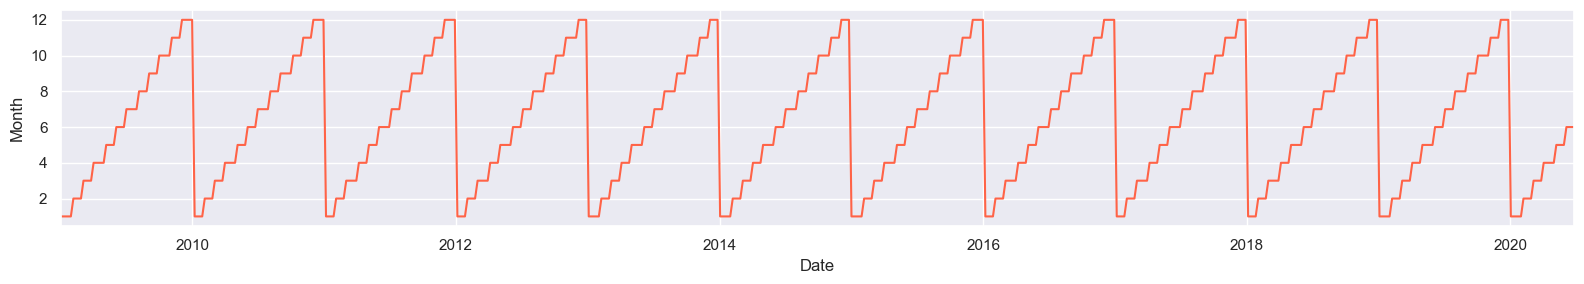

In [231]:
f, ax = plt.subplots(figsize=(16,3))

sns.lineplot(x=df_clean6.Date, y=df_clean6.Month, color='tomato').set(
    xlim=[df_clean6.Date.min(), df_clean6.Date.max()]
)
plt.tight_layout()

As we can see, it is misleading. Let's encode this cyclical feature:

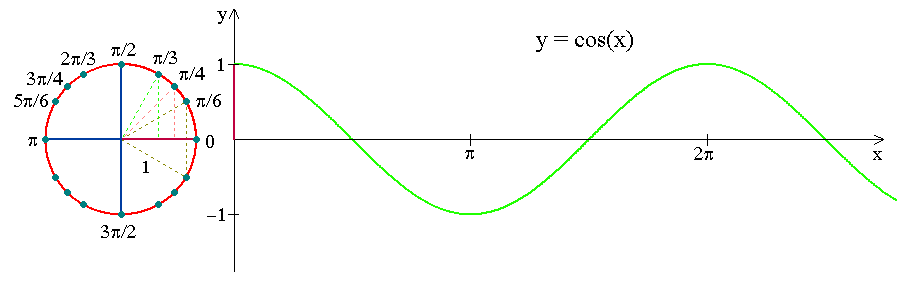

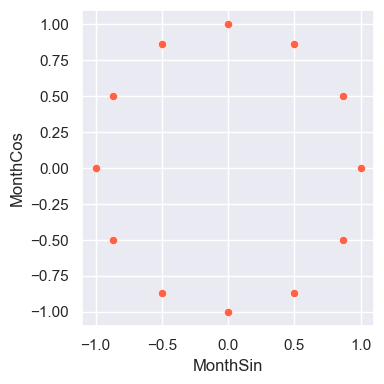

In [237]:
df_clean7 = df_clean6.copy()
num_of_month = 12

df_clean7['MonthSin'] = np.sin(2*np.pi*df_clean7.Month/num_of_month)
df_clean7['MonthCos'] = np.cos(2*np.pi*df_clean7.Month/num_of_month)

f, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x=df_clean7.MonthSin, y=df_clean7.MonthCos, color='tomato')
plt.tight_layout()

# **ACF/PACF**
ACF measures the linear relationships between observations at different time lags. The Partial Auto Correlation factor(PACF) is the partial correlation between the two points at a specific lag of time.

## **Determine P and Q value**

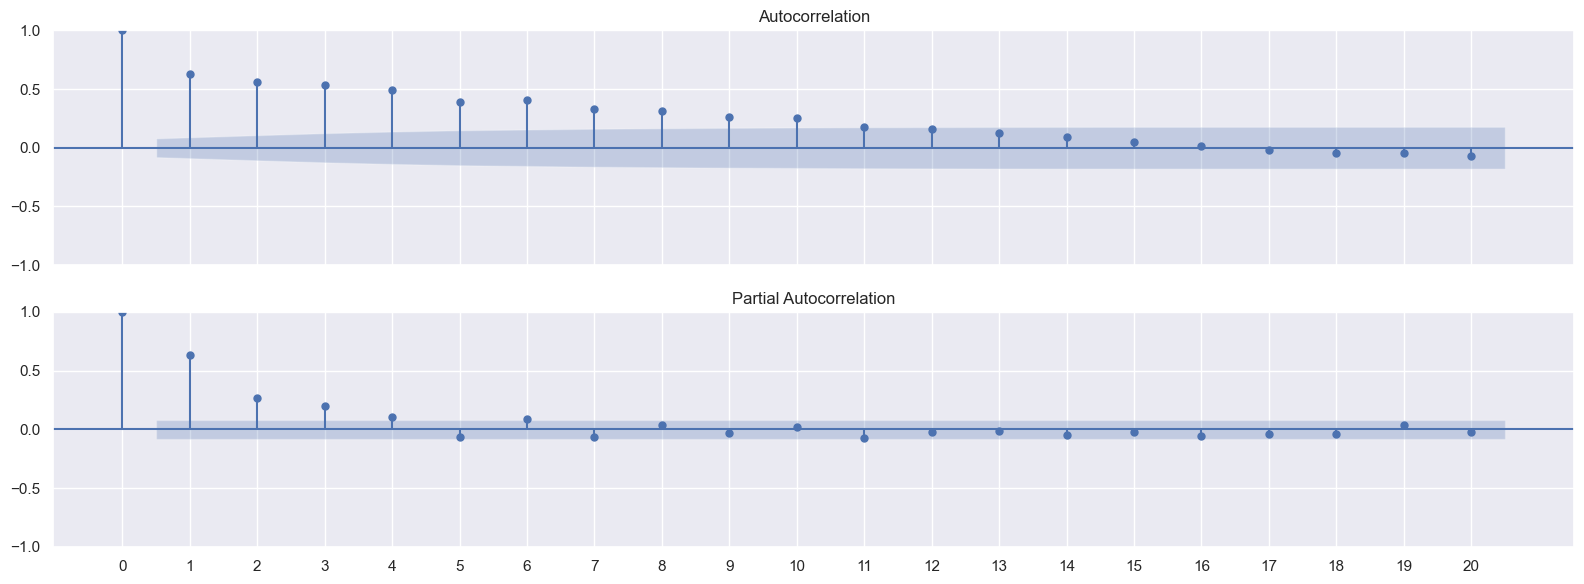

In [245]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 6), sharex=True)
plot_acf(df_clean7.DepthBoxcoxDiff1, lags=20, ax=ax[0])
plot_pacf(df_clean7.DepthBoxcoxDiff1, lags=20, ax=ax[1])
plt.xticks(range(0,21))
plt.tight_layout()

## **P and Q Value Using Auto ARIMA**

In [249]:
import pmdarima as pm
auto_arima_fit = pm.auto_arima(df_clean7.Depth, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.80 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-49.190, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-402.964, Time=0.56 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.74 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-292.283, Time=0.20 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-462.512, Time=1.10 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.06 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.72 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-159.171, Time=0.53 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-506.734, Time=1.76 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-446.572, Time=1.02 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=9.17 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=4.37 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=-529.397, Time=1.89 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=-468.10

In [264]:
auto_arima_fit = pm.auto_arima(df_clean7.DepthBoxcoxDiff1, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.20 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-4383.749, Time=0.32 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-4616.388, Time=0.75 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-4468.839, Time=0.71 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-4679.083, Time=1.24 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-4707.003, Time=1.35 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.40 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=-4784.294, Time=3.00 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=-4805.622, Time=2.10 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=inf, Time=4.42 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=2.37 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=-4710.461, Time=3.20 sec
 ARIMA(2,1,0)(1,1,2)[12]             : AIC=-4848.909, Time=5.00 sec
 ARIMA(2,1,0)(0,1,2)[12]           

In [266]:
auto_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  600
Model:             SARIMAX(3, 1, 0)x(2, 1, [1], 12)   Log Likelihood                2441.600
Date:                              Sun, 26 Mar 2023   AIC                          -4869.199
Time:                                      23:49:48   BIC                          -4838.574
Sample:                                           0   HQIC                         -4857.266
                                              - 600                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5820      0.030    -19.373      0.000      -0.641      -0.523
ar.L2         -0.4031      0.038    -10.492      0.000      -0.478      -0.328
ar.L3         -0.1676      0.037     -4.591      0.000      -0.239      -0.096
ar.S.L12      -0.0456      0.051     -0.892      0.373      -0.146       0.055
ar.S.L24      -0.0866      0.051     -1.708      0.088      -0.186       0.013
ma.S.L12      -0.8863      0.037    -23.643      0.000      -0.960      -0.813
sigma2      1.363e-05   5.44e-07     25.044      0.000    1.26e-05    1.47e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):               162.61
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -0.26
Prob(H) (two-sided):                  0.20   Kurtosis:                         5.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# **MODELING**